In [1]:
import pandas as pd
df = pd.read_csv("/Users/ishashah/Documents/python/DataScienceProject/conversion_data.csv")

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

# Index
- Load and Inspect Data
- Handle Age Outliers
- Inspect Country's distribution and its relationship with conversion
- Inspect Age's distribution and its relationship with conversion
- Data Preprocessing
- Classify by using Logistic Regression


In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [6]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [10]:
df['age'].value_counts()

30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
Name: age, dtype: int64

In [7]:
df.loc[df['age'] > 100,:]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [8]:
df.age[df['age'] <100].describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

# Remove age outlier as there are only 2 outliers

In [9]:
df = df.loc[df['age']<100,:]

In [10]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


## Inspect Country's distribution and its relationship with conversion

In [11]:
country_dist = df['country'].value_counts()
%matplotlib inline

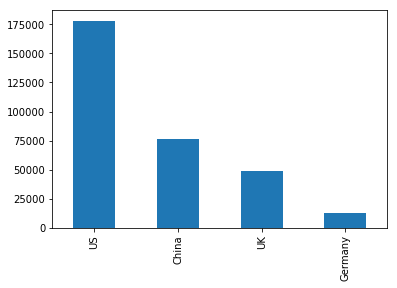

In [12]:
country_dist.plot(kind ="bar")

In [16]:
country_conver = df.groupby('country')['converted'].mean()
print(country_conver)

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64


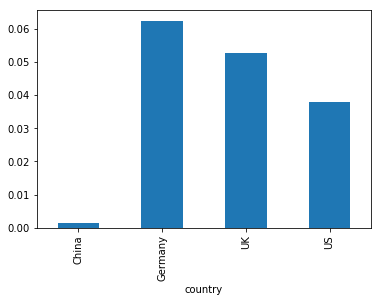

In [17]:
country_conver.plot(kind="bar")

## Analysis
- from above plots, at least we can see two problems:
- there are lot of users from China, but the conversion rate is lowest
- Conversion rate in German is very high, but there aren't a lot of users from German

# Inspect Age's distribution and its relationship with conversion


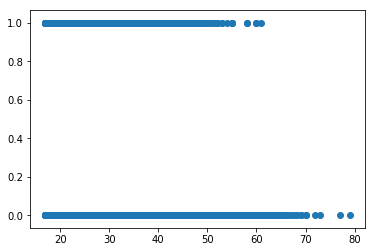

In [19]:
plt.scatter(df['age'],df['converted'])

- from above plot it looks like there is no conversion after the age 60 

# Data Preprocessing

In [20]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


- COnvert the categorical variables into numerical for logistic regression

In [21]:
X = df.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]

In [26]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [24]:
X = pd.get_dummies(X)

In [25]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [27]:
y = df['converted']

In [28]:
y.mean()

0.03225194340255157

from y's mean(), we know that, target value is very imbalanced, which reminds us should not use plain 'accurancy' as the metric to judge a classifier is good or not
then we need to split the whole dataset into 'training' dataset and 'test' dataset

In [36]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.333)

In [37]:
ytrain.mean(),ytest.mean()

(0.03226112354436141, 0.03223355556821851)

since both ytrain.mean() and ytest.mean() are similar to y.mean(), we can say, the splitting process doesn't import any bias

# Logistic Regression

In [38]:
model = LogisticRegressionCV()
model.fit(Xtrain,ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [39]:
model.C_

array([ 0.35938137])

In [40]:
model.scores_

{1: array([[ 0.98288811,  0.98459503,  0.98606014,  0.98654377,  0.98648687,
          0.98648687,  0.98648687,  0.98648687,  0.98648687,  0.98648687],
        [ 0.98236156,  0.98446679,  0.98553363,  0.9859177 ,  0.98597459,
          0.98596037,  0.98596037,  0.98596037,  0.98596037,  0.98596037],
        [ 0.98327193,  0.9849931 ,  0.98637288,  0.9866147 ,  0.98662892,
          0.98660048,  0.98660048,  0.98660048,  0.98660048,  0.98660048]])}

In [41]:
model.score(Xtrain,ytrain)

0.98633975647688044

In [42]:
ytest_predict = model.predict(Xtest)
print(classification_report(y_true=ytest,y_pred=ytest_predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    101900
          1       0.85      0.68      0.76      3394

avg / total       0.98      0.99      0.99    105294



from above, we know for "label=converted", if we use the default cutoff 0.5, we can have a high precision (0.85), but a not very good recall 0.68, which means we classify 32% converted user as non-converted.
since our task is giving Sales team and Marking team some insights, so we don't need to tune the cutoff value now, since that won't affect the model. however, if, for example, if we care more about not losing a valued customer, so incorrectly classifing a converted user as non-converted will pay much, we need to lower down the cut-off probability to be 1, which will increase the recall with the price lower than precision.
since this is an imbalanced classification problem, if we group every record as 'NOT converted', we can still get 96.73 accuracy (1-ytest.mean()). since our LR model produces an accurancy as 98.57% on test dataset, which indicates it is a model which makes sense.

In [51]:
feature_importance = pd.DataFrame({"name":Xtrain.columns,"coef":model.coef_[0]})
feature_importance = feature_importance[['name','coef']]
feature_importance['importance'] = np.abs(feature_importance['coef'])
feature_importance.sort_values(by='importance',inplace=True,ascending=False)
feature_importance

,name,coef,importance
3,country_China,-2.578957,2.578957
1,new_user,-1.728913,1.728913
4,country_Germany,1.124957,1.124957
5,country_UK,0.799974,0.799974
2,total_pages_visited,0.758023,0.758023
6,country_US,0.497773,0.497773
8,source_Direct,-0.154496,0.154496
0,age,-0.072728,0.072728
7,source_Ads,-0.012880,0.012880
9,source_Seo,0.011124,0.011124


from above model, we can draw below conclusion:

- conversion among China users are very bad. from inspection, we know that there are lot of users coming from China, but their conversion rate is very low. Consider China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate. we should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.
- conversion from Germany is good. but inspection, we know that there isn't a lot of users from German. so it's a huge opportuntity for us to target German users. for example, put more advertisement in German.
- old users have better conversion rate. we should keep touch with them, for example, send promotion email or coupons to old users.
- age is a negative factor. the older the user is, the less likely he/she will convert. then we should figure out why young people loves the web pages and strengthen it. and also find out why older people doesn't like our web pages, and try to correct it.
- total_pages_visited is a positive factor. the longer the user browse our web page, the more likely he/she will convert and buy something. then if we find some user browse a lot and didn't buy anything, we can send email to remaind them.